In [1]:
import os
import pandas
import warnings
import geopandas as gpd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import shapely

def moveit(gdf, angle = 0, xoffset = 0, yoffset = 0):
    gdf.geometry = gdf.geometry.apply(lambda x: shapely.affinity.rotate(x, angle))
    gdf.geometry = gdf.geometry.apply(lambda x: shapely.affinity.translate(x, xoff=xoffset, yoff=yoffset))
    
    return gdf

def makeboxfilter(gdf, left, right, top, bottom):
    swcorner = (left, bottom)
    nwcorner = (left, top)
    necorner = (right, top)
    secorner = (right, bottom)
    pointlist = [swcorner, nwcorner, necorner, secorner, swcorner]
    pgon = shapely.geometry.Polygon([[p[0], p[1]] for p in pointlist])
    bbox = pgon.envelope
    bbdf = gpd.GeoDataFrame(gpd.GeoSeries(bbox), columns=['geometry'])
    bbdf = bbdf.set_geometry('geometry')
    
    return bbdf

datadir = '/home/idies/workspace/raddick_census/'
os.chdir(datadir)
warnings.filterwarnings("ignore")

#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = gpd.read_file('naturalearth/ne_10m_admin_0_countries.shp')
#world.set_geometry('geometry')

world = world.set_index('ISO_A3')
print('ok')

ok


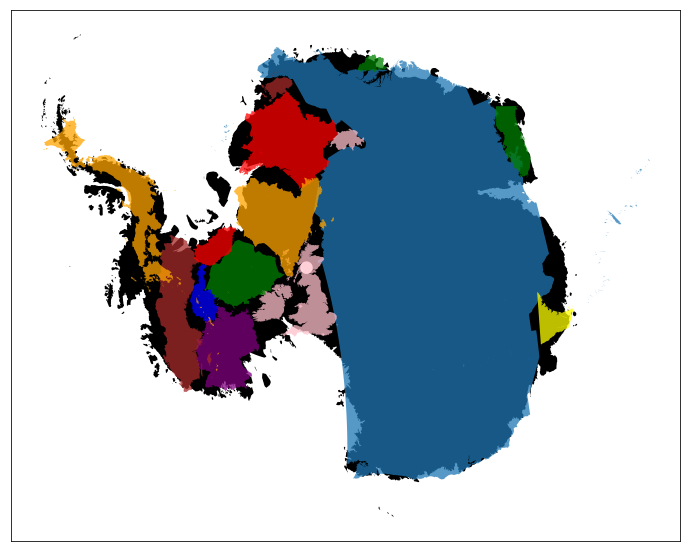

In [3]:
antarctica = world[world['NAME'] == 'Antarctica']
usa = world[world.index == 'USA']
tx = world[world.index == 'USA']
fl = world[world.index == 'USA']

antarctica = antarctica.to_crs('+proj=aea +lat_1=-82 +lat_2=-82 +lat_0=-90 +lon_0=0.001 +x_0=0 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs')

bbdf = makeboxfilter(usa, left=-130, right=-60, top=50, bottom=29)
usa = gpd.overlay(usa, bbdf, how='intersection')

flbbdf = makeboxfilter(fl, left=-83.5, right=-79, top=31.5, bottom=25)
usa = gpd.overlay(usa, flbbdf, how='difference')
fl = gpd.overlay(fl, flbbdf, how='intersection')

txbbdf = makeboxfilter(fl, left=-105, right=-92, top=29, bottom=25)
usa = gpd.overlay(usa, txbbdf, how='difference')
tx = gpd.overlay(tx, txbbdf, how='intersection')

jp = world[world.index == 'JPN']
#jpdf = makeboxfilter(jp, left=126, right=148, top=48, bottom=30)
#jp = gpd.overlay(jp, jpdf, how='intersection')

fr = world[world['NAME'] == 'France']

frbbdf = makeboxfilter(fr, left=-6, right=8, top=52, bottom=42)
fr = gpd.overlay(fr, frbbdf, how='intersection')

nl = world[world.index == 'NLD']
nlbbdf = makeboxfilter(nl, left=3, right=8, top=54, bottom=50)
nl = gpd.overlay(nl, nlbbdf, how='intersection')

de = world[world.index == 'DEU']
be = world[world.index == 'BEL']
gb = world[world.index == 'GBR']
ei = world[world.index == 'IRL']
ch = world[world.index == 'CHE']
es = world[world.index == 'ESP']
pl = world[world.index == 'POL']
hu = world[world.index == 'HUN']
at = world[world.index == 'AUT']
sw = world[world.index == 'SWE']


gbbbdf = makeboxfilter(fr, left=-9, right=2, top=60, bottom=50)
gb = gpd.overlay(gb, gbbbdf, how='intersection')

esbbdf = makeboxfilter(es, left=-10, right=5, top=45, bottom=35)
es = gpd.overlay(es, esbbdf, how='intersection')

for x in [usa, fl, tx, jp, fr, nl, be, de, gb, ei, ch, es, pl, hu, at, sw]:
    x.crs = {'init':'epsg:4326'}

usa = usa.to_crs('+proj=aea +lat_1=29.5 +lat_2=45.5 +lat_0=37.5 +lon_0=-96 +x_0=0 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs')
fl = fl.to_crs('+proj=aea +lat_1=24 +lat_2=31.5 +lat_0=24 +lon_0=-84 +x_0=400000 +y_0=0 +ellps=GRS80 +units=m +no_defs')
tx = tx.to_crs('+proj=aea +lat_1=27.5 +lat_2=35 +lat_0=18 +lon_0=-100 +x_0=0 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs')
jp = jp.to_crs('+proj=aea +lat_1=33 +lat_2=45 +lat_0=39 +lon_0=137 +x_0=0 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs')

fr = fr.to_crs('+proj=aea +lat_1=43.3333 +lat_2=50.8333 +lat_0=47 +lon_0=1 +x_0=0 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs')
nl = nl.to_crs('+proj=aea +lat_1=50.53 +lat_2=54.5 +lat_0=52.5 +lon_0=5.5 +x_0=0 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs')
be = be.to_crs('+proj=aea +lat_1=50 +lat_2=51 +lat_0=50.5 +lon_0=4.6 +x_0=0 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs')
de = de.to_crs('+proj=aea +lat_1=48.8333 +lat_2=52.3333 +lat_0=51 +lon_0=4.6 +x_0=0 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs')
gb = gb.to_crs('+proj=aea +lat_1=49.1111 +lat_2=60.9999 +lat_0=55 +lon_0=-6.5 +x_0=0 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs')
ei = ei.to_crs('+proj=aea +lat_1=49.1111 +lat_2=60.9999 +lat_0=55 +lon_0=-6.5 +x_0=0 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs')
ch = ch.to_crs('+proj=aea +lat_1=46.3333 +lat_2=48.8333 +lat_0=47 +lon_0=8 +x_0=0 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs')
es = es.to_crs('+proj=aea +lat_1=35.8333 +lat_2=44.1666 +lat_0=40 +lon_0=-3 +x_0=0 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs')
pl = pl.to_crs('+proj=aea +lat_1=49.5 +lat_2=54.5 +lat_0=52 +lon_0=19 +x_0=0 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs')
hu = hu.to_crs('+proj=aea +lat_1=44.3333 +lat_2=48.6667 +lat_0=47 +lon_0=19.5 +x_0=0 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs')
at = at.to_crs('+proj=aea +lat_1=46.25 +lat_2=49.25 +lat_0=47.75 +lon_0=13.5 +x_0=0 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs')
sw = sw.to_crs('+proj=aea +lat_1=56.3333 +lat_2=70.6667 +lat_0=65 +lon_0=17.5 +x_0=0 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs')


usa = moveit(usa, angle=105, xoffset=1175000, yoffset=-165000)
fl = moveit(fl, angle=0, xoffset=1450000, yoffset=720000)
tx = moveit(tx, angle=93, xoffset=2300000, yoffset=-1600000)
jp = moveit(jp, angle=75, xoffset=-1700000, yoffset=1100000)

fr = moveit(fr, angle=56, xoffset=-280000, yoffset=1200000)
nl = moveit(nl, angle=-35, xoffset=-300000, yoffset=1790000)
de = moveit(de, angle=-5, xoffset=-1200000, yoffset=-900000)
gb = moveit(gb, angle=-15, xoffset=-200000, yoffset=-260000)
ei = moveit(ei, angle=-15, xoffset=-240000, yoffset=-240000)
ch = moveit(ch, angle=0, xoffset=390000, yoffset=1240000)
be = moveit(be, angle=40, xoffset=670000, yoffset=1955000)
es = moveit(es, angle=260, xoffset=-340000, yoffset=400000)
pl = moveit(pl, angle=54, xoffset=-650000, yoffset=-150000)
hu = moveit(hu, angle=22, xoffset=-900000, yoffset=125000)
at = moveit(at, angle=265, xoffset=-1000000, yoffset=-310000)
sw = moveit(sw, angle=20, xoffset=-1210000, yoffset=-200000)

fig, ax = plt.subplots(figsize=(12,12))
ax.set_aspect('equal')

plt.tick_params(axis='both', which='both', left='off', bottom='off', labelleft='off', labelbottom='off') # labels along the bottom edge are off

antarctica.plot(ax=ax, alpha=1, color='black')
usa.plot(ax=ax, alpha=0.75)
fl.plot(ax=ax, alpha=0.75, color='green')
tx.plot(ax=ax, alpha=0.75, color='yellow')
fr.plot(ax=ax, alpha=0.75, color='red')
nl.plot(ax=ax, alpha=0.75, color='brown')
de.plot(ax=ax, alpha=0.75, color='purple')
gb.plot(ax=ax, alpha=0.75, color='pink')
ei.plot(ax=ax, alpha=0.75, color='pink')
ch.plot(ax=ax, alpha=0.75, color='pink')
be.plot(ax=ax, alpha=0.75, color='green')
es.plot(ax=ax, alpha=0.75, color='orange')
pl.plot(ax=ax, alpha=0.75, color='green')
sw.plot(ax=ax, alpha=0.75, color='brown')
hu.plot(ax=ax, alpha=0.75, color='red')
at.plot(ax=ax, alpha=0.75, color='blue')
jp.plot(ax=ax, alpha=0.75, color='orange')

plt.show()
#world[world['name'] == 'Austria']

##### os.getcwd()
world[world['NAME'].apply(lambda x: 'F' in x)]
#world.columns
world['ISO_A2']